# Exercise 04


# Part 1 - Linear Regression

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor


%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,36347.0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,24362.0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,108554.0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,88681.0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,108863.0


In [2]:
income.shape

(32561, 15)

# Exercise 4.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

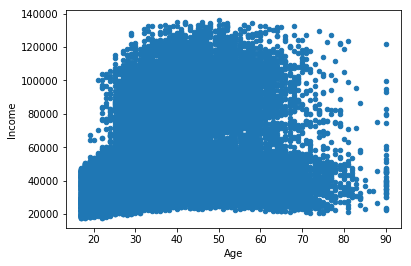

In [3]:
income.plot(x='Age', y='Income', kind='scatter')

##### normalizando la data

Text(0,0.5,'Income')

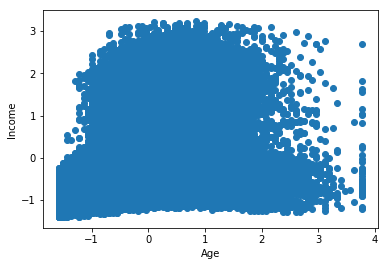

In [4]:
y = income['Income'].values
X = income['Age'].values


y_mean, y_std = y.mean(), y.std()
X_mean, X_std = X.mean(), X.std()

y = (y - y_mean)/ y_std
X = (X - X_mean)/ X_std

plt.scatter(X, y)
plt.xlabel('Age')
plt.ylabel('Income')

#### Primera aproximación de la regresión

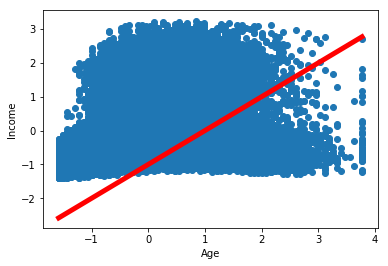

In [5]:
# create X and y
n_samples = X.shape[0]
X_ = np.c_[np.ones(n_samples), X]
beta_ini = np.array([-1, 1])

# h
def lr_h(beta,x):
    return np.dot(beta, x.T)

# scatter plot
plt.scatter(X, y)

# Plot the linear regression
x = np.c_[np.ones(2), [X.min(), X.max()]]
plt.plot(x[:, 1], lr_h(beta_ini, x), 'r', lw=5)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [6]:
# Initialize
linreg = LinearRegression(fit_intercept=False)

# Fit
linreg.fit(X_, y)

linreg.coef_

array([6.42181590e-17, 2.90408298e-01])

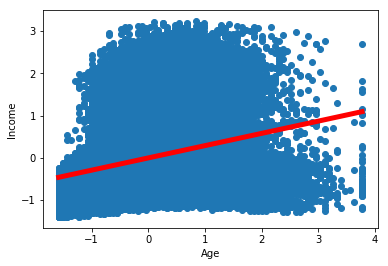

In [7]:
# create X and y
n_samples = X.shape[0]
X_ = np.c_[np.ones(n_samples), X]
beta_ini = np.array([6.42181590e-17, 2.90408298e-01])

# h
def lr_h(beta,x):
    return np.dot(beta, x.T)

# scatter plot
plt.scatter(X, y)

# Plot the linear regression
x = np.c_[np.ones(2), [X.min(), X.max()]]
plt.plot(x[:, 1], lr_h(beta_ini, x), 'r', lw=5)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

Una vez ajustados los betas de la regresión, la tendencia muestra una relación directa creciente entre ambas variables, es decir que a medida que aumenta la edad, tiende a aumentar el ingreso. Estrictamente, la evidencia del modelo indica que por cada año que aumenta la persona, el ingreso aumenta 0,29 veces el ingreso.

#### Predicción

In [8]:
clf1 = LinearRegression()
clf1.fit(income[['Age']], income['Income'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:

x = np.array([30,])

clf1.predict(x.reshape(1, -1))

array([48803.11784304])

In [10]:

x = np.array([40,])

clf1.predict(x.reshape(1, -1))

array([54224.79441376])

# Exercise 4.2
Evaluate the model using the MSE

In [11]:
from sklearn import metrics


y_pred=clf1.predict(income[['Age']])
metrics.mean_squared_error(income['Income'], y_pred)

593783043.8402299


# Exercise 4.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [12]:
income['Age2']=income['Age']**2
X = income[['Age', 'Age2']].values

from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X.astype(np.float))
X = ss.transform(X.astype(np.float))
ss.mean_, ss.scale_

X_ = np.c_[np.ones(n_samples), X]

betas_ols = np.dot(np.linalg.inv(np.dot(X_.T, X_)),np.dot(X_.T, y))
betas_ols



array([ 4.09935228e-16,  1.67751068e+00, -1.41415206e+00])

# Exercise 4.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [13]:

from sklearn import metrics
import numpy as np

clf1.fit(income[['Age', 'Age2']], income['Income'])


metrics.mean_squared_error(income['Income'], clf1.predict(income[['Age', 'Age2']]))

544646260.781817

# Part 2: Logistic Regression

### Customer Churn: 
losing/attrition of the customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.

### Data
Dataset is from a telecom service provider where they have the service usage(international plan, voicemail plan, usage in daytime, usage in evenings and nights and so on) and basic demographic information(state and area code) of the user. For labels, I have a single data point whether the customer is churned out or not.


In [14]:
# Download the dataset
import pandas as pd

data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [15]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Exercise 4.5

Create Y and X

What is the distribution of the churners?

Split the data in train (70%) and test (30%)


In [30]:
data['daymins']=data['Day Mins']

In [32]:
from sklearn.linear_model import LinearRegression
import pandas as pd

linreg = LinearRegression()
feature_cols = ['daymins']
data['a']= data['Churn?']
data['a_']=data['a'].replace('False.',0)
data['b_']=data['a_'].replace('True.',1)

X = data[feature_cols]
y = data.b_




In [17]:
pd.value_counts(data['b_'])

0    2850
1     483
Name: b_, dtype: int64

In [33]:
# create training and testing vars
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3)

print('train',len(train))
print('test',len(test))
print('Total Data',len(data))


train 2333
test 1000
Total Data 3333


# Exercise 4.6

Train a Logistic Regression using the training set and apply the algorithm to the testing set.

In [34]:
# fit a linear regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
feature_cols = ['daymins']
X = train[feature_cols]
y = train.b_
logreg.fit(X, y)
train['churn_predict'] = logreg.predict(X)

C:\Users\c_pal\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0,0.5,'b_')

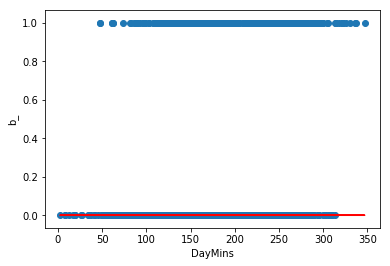

In [35]:
# plot the class predictions
plt.scatter(train.daymins, train.b_)
plt.plot(train.daymins, train.churn_predict, color='red')
plt.xlabel('DayMins')
plt.ylabel('b_')

In [45]:
# fit a linear regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
feature_cols = ['daymins']
X = test[feature_cols]
y = test.b_
logreg.fit(X, y)
test['churn_predict'] = logreg.predict_proba(X)[:, 1]

C:\Users\c_pal\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0,0.5,'b_')

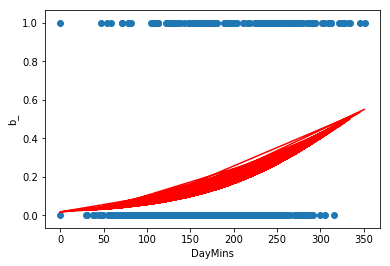

In [46]:
# plot the class predictions
plt.scatter(test.daymins, test.b_)
plt.plot(test.daymins, test.churn_predict, color='red')
plt.xlabel('DayMins')
plt.ylabel('b_')

# Exercise 4.7

a) Create a confusion matrix using the prediction on the 30% set.

b) Estimate the accuracy of the model in the 30% set


In [40]:
###Matriz de confusión 
from sklearn.metrics import confusion_matrix
#y_true = [2, 0, 2, 2, 0, 1]
#y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(test['b_'], test['churn_predict'])

array([[846,   0],
       [151,   3]], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(test['b_'], test['churn_predict'])

0.849

In [43]:
from sklearn.metrics import classification_report
print(classification_report(test['b_'],test['churn_predict']))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92       846
          1       1.00      0.02      0.04       154

avg / total       0.87      0.85      0.78      1000

